<a href="https://colab.research.google.com/github/vpagonis/EURADOS-2023/blob/main/Code3_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FOM= 0.84  %
+----------+------+--------+----------+
|   Imax   |  b   | E (eV) | Tmax (K) |
+----------+------+--------+----------+
|  9789.4  | 1.02 |  1.22  |  387.37  |
| 21123.71 | 1.18 |  1.38  |  428.24  |
| 27550.17 | 2.01 |  2.14  |  462.33  |
| 50556.31 | 1.19 |  2.62  |  488.18  |
| 7393.48  | 1.23 |  1.45  |  493.41  |
| 5590.19  | 1.18 |  1.15  |  527.78  |
| 6082.14  | 1.38 |  2.47  |  558.97  |
| 1537.97  | 1.0  |  3.03  |  585.25  |
| 2355.67  | 1.87 |  2.07  |  601.83  |
+----------+------+--------+----------+


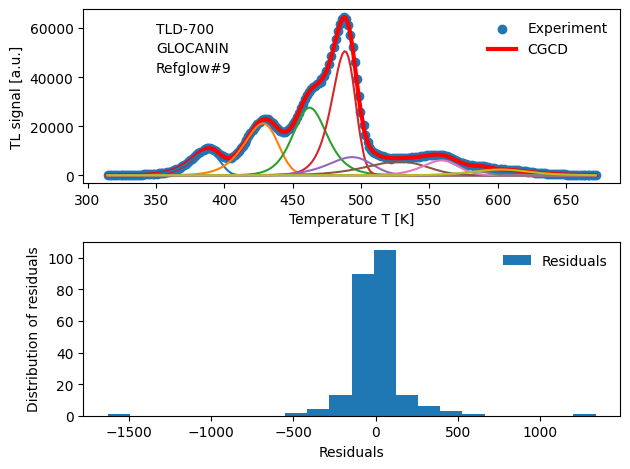

In [3]:
##Deconvolution of 9-peak data with transformed GOK-TL eqt
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore")
import requests
    

# read data file from GitHub
url='https://github.com/vpagonis/EURADOS-2023/raw/main/Refglow009.txt'
response=requests.get(url)
a=response.text
b=np.array(list(map(float,a.strip("[]").split())))
data=b.reshape(-1,2)

x_data,y_data = data[:, 0], data[:, 1] 
#y_data=y_data/max(y_data)

kB=8.617E-5
def TL(T, imax,b, En,Tmax):
    return imax* np.exp(En/(kB*T)*(T-Tmax)/Tmax)*(b**\
    ((b/(b-1))))*((1+(b-1)*2*kB*Tmax/En+(b-1)*(1-2*kB*T/\
    En)*np.exp(En/(kB*T)*(T-Tmax)/Tmax)*(T**2.0)/(Tmax**\
    2.0))**(b/(1-b)))
def total_TL(T, *inis): 
    u=np.array([0 for i in range(len(x_data))])
    imaxs,     bs,        Es,         Tmaxs=\
    inis[0:9],inis[9:18],inis[18:27], inis[27:36]
    for i in range(9):
        u=u+TL(T,imaxs[i],bs[i], Es[i],Tmaxs[i])
    return u                 
inis = (9824,21009,27792,50520,7153,5496,6080,1641,2316,
1.02, 1.15, 1.99,1.20, 1.28,1.19,1.40,1.01,1.18,
1.24,1.36,2.10, 2.65,1.43, 1.16,2.48,2.98,2.25,
 387,428,462,488,493,528,559,585, 602)
params, params_covariance = optimize.curve_fit(total_TL,\
x_data,y_data,p0=inis)
plt.subplot(2,1, 1)
plt.scatter(x_data, y_data, label='Experiment')
plt.plot(x_data, total_TL(x_data, 
*params),c='r',linewidth=3, label='CGCD')
for i in range(9):
    plt.plot(x_data, TL(x_data, *params[i:36:9]))
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.ylabel('TL signal [a.u.]')
plt.xlabel(r'Temperature T [K]')
plt.text(350, 58000,'TLD-700')
plt.text(350, 50000,'GLOCANIN')
plt.text(350, 42000,'Refglow#9')
plt.subplot(2,1, 2)
res=total_TL(x_data, *params)-y_data
plt.hist(res,22,label='Residuals')
plt.ylabel('Distribution of residuals')
plt.xlabel(r'Residuals')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.tight_layout()
FOM=round(100*np.sum(abs(res))/np.sum(y_data),2)
myTable = PrettyTable(["Imax", "b", "E (eV)", "Tmax (K)"]) 
for i in range(9):
    myTable.add_row(np.round(params[i:36:9],2))
print('FOM=',FOM,' %')
print(myTable)
plt.show()